In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


 datasets: title.basics.tsv.gz and title.ratings.tsv.gz
 
 from: http://www.imdb.com/interfaces/


In [ ]:
data=pd.read_csv('data.tsv',sep='\t') #load data into CSV
data.head(5)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0.0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0.0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0.0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0.0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0.0,1893,\N,1,"Comedy,Short"


In [ ]:
ratings=pd.read_csv('ratings.tsv',sep='\t') #load ratings into CSV
ratings.head(5)

,tconst,averageRating,numVotes
0,tt0000001,5.7,1889
1,tt0000002,5.9,251
2,tt0000003,6.5,1680
3,tt0000004,5.7,164
4,tt0000005,6.2,2499


In [ ]:
pd.set_option('display.float_format', lambda x:'%.2f'% x) #for scientific notation of values

In [ ]:
ratings.describe()

,averageRating,numVotes
count,1254722.00,1254722.00
mean,6.92,998.18
std,1.39,16779.04
min,1.00,5.00
25%,6.20,11.00
50%,7.10,24.00
75%,7.90,94.00
max,10.00,2599009.00


Text(0, 0.5, 'title')

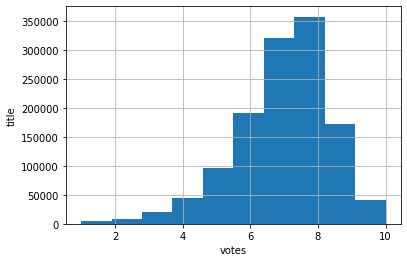

In [ ]:
ratings['averageRating'].hist() #to better see ratings distribution
plt.xlabel('votes')
plt.ylabel('title')

In [ ]:
df=data.merge(ratings,on='tconst') #join using 'tconst'
df.sample(5)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
207039,tt0364151,tvSeries,American Masters,American Masters,0.00,1985,\N,90,"Biography,Documentary,Music",8.20,1024
229149,tt0413670,video,All About Kira,All About Kira,1.00,2004,\N,\N,Adult,7.60,11
157071,tt0255900,short,Citizen Steve,Citizen Steve,0.00,1987,\N,23,"Biography,Documentary,Short",6.10,58
37213,tt0058146,movie,Mondo Inferno,Il pelo nel mondo,0.00,1964,\N,89,Documentary,5.10,38
177402,tt0295682,movie,The Warrior,The Warrior,0.00,2001,\N,86,"Adventure,Drama",6.70,2632


In [ ]:
df_m=df['titleType']=='movie' #filter on movies
df_movie=df[df_m]
df_movie

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
340,tt0000502,movie,Bohemios,Bohemios,0.00,1905,\N,100,\N,4.50,14
374,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0.00,1906,\N,70,"Action,Adventure,Biography",6.00,772
383,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0.00,1907,\N,90,Drama,4.50,18
398,tt0000615,movie,Robbery Under Arms,Robbery Under Arms,0.00,1907,\N,\N,Drama,4.50,23
406,tt0000630,movie,Hamlet,Amleto,0.00,1908,\N,\N,Drama,3.90,25
...,...,...,...,...,...,...,...,...,...,...,...
245795,tt0453205,movie,Xin su nu yan tan,Xin su nu yan tan,0.00,1992,\N,85,Drama,5.30,7
245796,tt0453206,movie,Saplot,Saplot,0.00,2004,\N,\N,"Drama,Mystery",1.40,35
245800,tt0453212,movie,Shan ge lian,Shan ge lian,0.00,1964,\N,106,Musical,6.70,19
245804,tt0453223,movie,Taekwondo,Tai quan dao,0.00,2004,\N,102,Drama,7.40,24


In [ ]:
df_movie['genres'].sample(20)

35783                   Comedy,Drama
45048                         Horror
100104                         Drama
14664                 Comedy,Mystery
120181                         Adult
216410                        Comedy
113619                 Drama,Romance
173549                         Drama
238532    Action,Adventure,Animation
89351                         Comedy
21608       Action,Adventure,Musical
32791                    Crime,Drama
189439                            \N
113814                  Action,Drama
123542                 Drama,Mystery
35094          Drama,Musical,Romance
112134                         Drama
41466      Biography,History,Romance
24270                        Western
24188          Crime,Drama,Film-Noir
Name: genres, dtype: object

In [ ]:
df_t=df_movie['genres'].str.contains('Thriller')#filter on genre thriller

In [ ]:
df_t.value_counts()#counting thriller and not thriller

False    125139
True       8523
Name: genres, dtype: int64

In [ ]:
df_thriller=df_movie[df_t]#getting filtered dataframe
df_thriller.head(5)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
1160,tt0002588,movie,Zigomar contre Nick Carter,Zigomar contre Nick Carter,0.00,1912,\N,48,"Crime,Thriller",6.00,37
1169,tt0002628,movie,Der Andere,Der Andere,0.00,1913,\N,48,"Drama,Thriller",5.60,96
1337,tt0003584,movie,"The $5, 000, 000 Counterfeiting Plot","The $5,000,000 Counterfeiting Plot",0.00,1914,\N,\N,"Crime,Thriller",7.20,26
1594,tt0004866,movie,After Five,After Five,0.00,1915,\N,50,"Comedy,Thriller",4.90,23
1826,tt0005997,movie,The Sable Lorcha,The Sable Lorcha,0.00,1915,\N,\N,"Adventure,Crime,Thriller",6.00,24


In [ ]:
lista=df_thriller.sort_values(by=['averageRating','numVotes'],ascending=False)#sorting by better ratings
lista.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
170983,tt0283524,movie,Opasen char,Opasen char,0.00,1984,\N,90,"Comedy,Thriller",8.90,1772
175394,tt0291855,movie,Devasuram,Devasuram,0.00,1993,\N,187,"Action,Drama,Thriller",8.70,5739
75834,tt0102926,movie,The Silence of the Lambs,The Silence of the Lambs,0.00,1991,\N,118,"Crime,Drama,Thriller",8.60,1391497
231849,tt0419781,movie,Graves End,Graves End,0.00,2005,\N,90,"Mystery,Thriller",8.60,6658
172199,tt0285665,movie,Kuruthipunal,Kuruthipunal,0.00,1995,\N,143,"Action,Drama,Thriller",8.60,4334


In [ ]:
lista['logvotes']=np.log(ratings['numVotes'])#log scaling numVotes
lista

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,logvotes
170983,tt0283524,movie,Opasen char,Opasen char,0.00,1984,\N,90,"Comedy,Thriller",8.90,1772,7.48
175394,tt0291855,movie,Devasuram,Devasuram,0.00,1993,\N,187,"Action,Drama,Thriller",8.70,5739,8.66
75834,tt0102926,movie,The Silence of the Lambs,The Silence of the Lambs,0.00,1991,\N,118,"Crime,Drama,Thriller",8.60,1391497,14.15
231849,tt0419781,movie,Graves End,Graves End,0.00,2005,\N,90,"Mystery,Thriller",8.60,6658,8.80
172199,tt0285665,movie,Kuruthipunal,Kuruthipunal,0.00,1995,\N,143,"Action,Drama,Thriller",8.60,4334,8.37
...,...,...,...,...,...,...,...,...,...,...,...,...
131089,tt0199036,movie,Soft Air,Soft Air,0.00,1997,\N,86,"Drama,Thriller",1.50,165,5.11
167920,tt0277951,movie,Perversión,Perversión,0.00,1996,\N,90,"Drama,Horror,Thriller",1.50,10,2.30
211650,tt0374170,movie,Replica,Replica,0.00,2005,\N,66,"Romance,Thriller",1.40,390,5.97
184100,tt0309422,movie,The Case He Couldn't Crack,The Case He Couldn't Crack,0.00,1981,\N,70,"Crime,Thriller",1.00,145,4.98


In [ ]:
lista['averageRating']/=lista['averageRating'].max()#scaling ratings between 0-1
lista['logvotes']/=lista['logvotes'].max() #
lista

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,logvotes
170983,tt0283524,movie,Opasen char,Opasen char,0.00,1984,\N,90,"Comedy,Thriller",1.00,1772,0.53
175394,tt0291855,movie,Devasuram,Devasuram,0.00,1993,\N,187,"Action,Drama,Thriller",0.98,5739,0.61
75834,tt0102926,movie,The Silence of the Lambs,The Silence of the Lambs,0.00,1991,\N,118,"Crime,Drama,Thriller",0.97,1391497,1.00
231849,tt0419781,movie,Graves End,Graves End,0.00,2005,\N,90,"Mystery,Thriller",0.97,6658,0.62
172199,tt0285665,movie,Kuruthipunal,Kuruthipunal,0.00,1995,\N,143,"Action,Drama,Thriller",0.97,4334,0.59
...,...,...,...,...,...,...,...,...,...,...,...,...
131089,tt0199036,movie,Soft Air,Soft Air,0.00,1997,\N,86,"Drama,Thriller",0.17,165,0.36
167920,tt0277951,movie,Perversión,Perversión,0.00,1996,\N,90,"Drama,Horror,Thriller",0.17,10,0.16
211650,tt0374170,movie,Replica,Replica,0.00,2005,\N,66,"Romance,Thriller",0.16,390,0.42
184100,tt0309422,movie,The Case He Couldn't Crack,The Case He Couldn't Crack,0.00,1981,\N,70,"Crime,Thriller",0.11,145,0.35


In [ ]:
lista['metric']=lista['averageRating']*lista['logvotes']#using the multiplication of averageRating  and logvotes as a more objective metric
lista

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,logvotes,metric
170983,tt0283524,movie,Opasen char,Opasen char,0.00,1984,\N,90,"Comedy,Thriller",1.00,1772,0.53,0.53
175394,tt0291855,movie,Devasuram,Devasuram,0.00,1993,\N,187,"Action,Drama,Thriller",0.98,5739,0.61,0.60
75834,tt0102926,movie,The Silence of the Lambs,The Silence of the Lambs,0.00,1991,\N,118,"Crime,Drama,Thriller",0.97,1391497,1.00,0.97
231849,tt0419781,movie,Graves End,Graves End,0.00,2005,\N,90,"Mystery,Thriller",0.97,6658,0.62,0.60
172199,tt0285665,movie,Kuruthipunal,Kuruthipunal,0.00,1995,\N,143,"Action,Drama,Thriller",0.97,4334,0.59,0.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131089,tt0199036,movie,Soft Air,Soft Air,0.00,1997,\N,86,"Drama,Thriller",0.17,165,0.36,0.06
167920,tt0277951,movie,Perversión,Perversión,0.00,1996,\N,90,"Drama,Horror,Thriller",0.17,10,0.16,0.03
211650,tt0374170,movie,Replica,Replica,0.00,2005,\N,66,"Romance,Thriller",0.16,390,0.42,0.07
184100,tt0309422,movie,The Case He Couldn't Crack,The Case He Couldn't Crack,0.00,1981,\N,70,"Crime,Thriller",0.11,145,0.35,0.04


In [ ]:
#sorting the films from best to worst according to the metric, and copying them into a csv
film_thrill=lista.sort_values(by='metric',ascending=False)
film_thrill=film_thrill[['originalTitle','genres','metric']]
film_thrill=film_thrill.reset_index()
film_thrill=film_thrill[['originalTitle','genres','metric']]
film_thrill.to_csv('film_thriller.csv')